In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 19s - 539ms/step - loss: 0.0421
Epoch 2/20
35/35 - 6s - 177ms/step - loss: 0.0123
Epoch 3/20
35/35 - 7s - 194ms/step - loss: 0.0106
Epoch 4/20
35/35 - 6s - 170ms/step - loss: 0.0096
Epoch 5/20
35/35 - 5s - 154ms/step - loss: 0.0097
Epoch 6/20
35/35 - 5s - 149ms/step - loss: 0.0076
Epoch 7/20
35/35 - 5s - 145ms/step - loss: 0.0072
Epoch 8/20
35/35 - 5s - 144ms/step - loss: 0.0066
Epoch 9/20
35/35 - 5s - 143ms/step - loss: 0.0067
Epoch 10/20
35/35 - 5s - 150ms/step - loss: 0.0070
Epoch 11/20
35/35 - 5s - 150ms/step - loss: 0.0058
Epoch 12/20
35/35 - 5s - 149ms/step - loss: 0.0060
Epoch 13/20
35/35 - 5s - 145ms/step - loss: 0.0063
Epoch 14/20
35/35 - 5s - 143ms/step - loss: 0.0056
Epoch 15/20
35/35 - 5s - 144ms/step - loss: 0.0065
Epoch 16/20
35/35 - 5s - 149ms/step - loss: 0.0064
Epoch 17/20
35/35 - 5s - 152ms/step - loss: 0.0052
Epoch 18/20
35/35 - 6s - 159ms/step - loss: 0.0072
Epoch 19/20
35/35 - 5s - 147ms/step - loss: 0.0051
Epoch 20/20
35/35 - 5s - 148ms/step - l

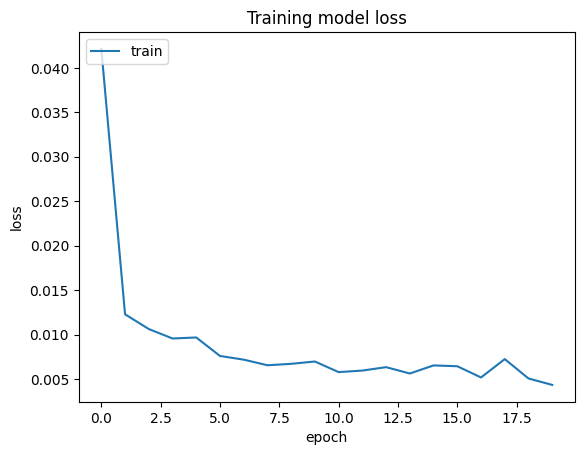

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


array([[1.1835895],
       [1.1866437],
       [1.1985004],
       [1.2167184],
       [1.2321709],
       [1.2339836],
       [1.2219667],
       [1.2039773],
       [1.1916983],
       [1.1879823],
       [1.1813148],
       [1.1700009],
       [1.1593108],
       [1.1492994],
       [1.1463959],
       [1.1504344],
       [1.1684039],
       [1.1977049],
       [1.2319824],
       [1.2665101],
       [1.2822187],
       [1.2807064],
       [1.2610275],
       [1.2312487],
       [1.2032963],
       [1.186257 ],
       [1.1809582],
       [1.1795222],
       [1.1718209],
       [1.160034 ],
       [1.1468524],
       [1.1321269],
       [1.1110202],
       [1.0851   ],
       [1.0733439],
       [1.0818034],
       [1.1041211],
       [1.1307731],
       [1.1566852],
       [1.1712283],
       [1.1851394],
       [1.2014972],
       [1.2203737],
       [1.2382106],
       [1.2507098],
       [1.2532626],
       [1.2439022],
       [1.2343508],
       [1.2308663],
       [1.2357556],


In [14]:
predicted_price = sc.inverse_transform(y_pred)

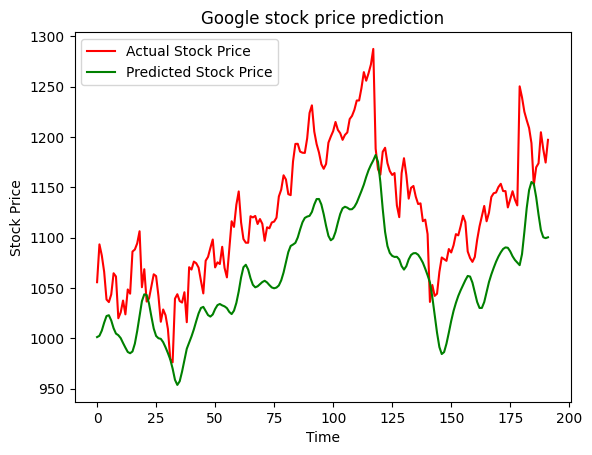

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()